In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [11]:
pip install geopandas matplotlib


Note: you may need to restart the kernel to use updated packages.


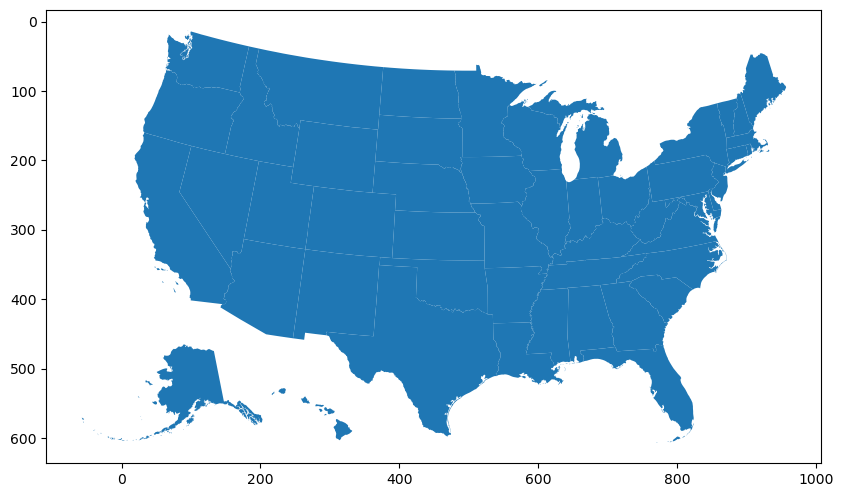

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON file
geojson_file_path = './data/states-albers-10m.json'
gdf = gpd.read_file(geojson_file_path)



# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax)
ax.set_ylim(ax.get_ylim()[::-1])  # Reverse the y-axis to flip the map
plt.show()


In [28]:
gdf

,id,name,geometry
0,04015,Mohave,"POLYGON ((175.343 316.840, 176.024 313.302, 18..."
1,22105,Tangipahoa,"POLYGON ((603.300 478.091, 603.676 478.067, 60..."
2,16063,Lincoln,"POLYGON ((194.013 172.310, 197.566 172.981, 20..."
3,27119,Polk,"POLYGON ((480.532 89.272, 490.380 89.337, 490...."
4,38017,Cass,"POLYGON ((471.599 110.160, 475.538 110.249, 48..."
...,...,...,...
3137,31101,Keith,"POLYGON ((395.581 244.035, 395.834 240.075, 39..."
3138,28001,Adams,"POLYGON ((586.753 462.248, 587.961 461.903, 58..."
3139,36069,Ontario,"POLYGON ((800.320 178.561, 801.914 178.270, 80..."
3140,54053,Mason,"POLYGON ((740.068 281.384, 741.418 279.532, 74..."


In [16]:
src = 'Data/k12ssd-Incident.csv'
df_inc = pd.read_csv(src,encoding='latin1')
print(df_inc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Incident_ID              2514 non-null   object 
 1   Month                    2514 non-null   int64  
 2   Day                      2514 non-null   int64  
 3   Year                     2514 non-null   int64  
 4   Date                     2514 non-null   object 
 5   School                   2514 non-null   object 
 6   Victims_Killed           2514 non-null   int64  
 7   Victims_Wounded          2514 non-null   int64  
 8   Number_Victims           2514 non-null   int64  
 9   Shooter_Killed           2514 non-null   int64  
 10  Source                   2514 non-null   object 
 11  Number_News              1106 non-null   float64
 12  Media_Attention          1191 non-null   object 
 13  Reliability              2514 non-null   int64  
 14  Quarter                 

In [91]:
df_pov = pd.read_excel('Data/PovertyEstimates.xlsx')
df_uscities = pd.read_csv('Data/uscities.csv')

In [97]:
df_pov

def extract_codes(fips):
    fips_str = str(fips)
    if len(fips_str) == 5:
        state_code = fips_str[:2]
        county_code = fips_str[-3:]
    elif len(fips_str) == 4:
        state_code = '0'+fips_str[0]
        county_code = fips_str[-3:]
    else:
        raise ValueError("Invalid FIPS code length")
    return pd.Series({'state_code': state_code, 'county_code': county_code})

# Apply the custom function to create new columns
df_pov[['state_code', 'county_code']] = df_pov['FIPS_Code'].apply(extract_codes)

# Display the resulting DataFrame
df_pov

,FIPS_Code,Stabr,Area_name,overall_poverty_perc,poverty_perc(0-17),state_code,county_code
0,1000,AL,Alabama,16.3,22.7,01,000
1,1001,AL,Autauga,10.7,16.1,01,001
2,1003,AL,Baldwin,10.8,16.4,01,003
3,1005,AL,Barbour,23.0,35.1,01,005
4,1007,AL,Bibb,20.6,29.0,01,007
...,...,...,...,...,...,...,...
3189,56037,WY,Sweetwater,9.2,9.7,56,037
3190,56039,WY,Teton,5.9,5.5,56,039
3191,56041,WY,Uinta,9.4,11.2,56,041
3192,56043,WY,Washakie,10.2,12.5,56,043


In [98]:
df_uscities

,city,city_ascii,state_id,state_name,county_fips,county_name,population,density
0,Anchorage,Anchorage,AK,Alaska,2020,Anchorage,292545,66.2
1,Fairbanks,Fairbanks,AK,Alaska,2090,Fairbanks North Star,70817,401.6
2,Juneau,Juneau,AK,Alaska,2110,Juneau,32240,4.6
3,Badger,Badger,AK,Alaska,2090,Fairbanks North Star,19226,113.1
4,Knik-Fairview,Knik-Fairview,AK,Alaska,2170,Matanuska-Susitna,18282,96.0
...,...,...,...,...,...,...,...,...
30839,Beulah,Beulah,WY,Wyoming,56011,Crook,0,18.9
30840,Carter,Carter,WY,Wyoming,56041,Uinta,0,3.4
30841,Powder River,Powder River,WY,Wyoming,56025,Natrona,0,0.3
30842,Etna,Etna,WY,Wyoming,56023,Lincoln,0,64.8


In [49]:
df_uscities[df_uscities['county_name'].str.contains('county')]

,city,city_ascii,state_id,state_name,county_fips,county_name,population,density


In [17]:
df_inc['School_Level'].value_counts()

High           1561
Elementary      465
Middle          249
Junior High      66
Unknown          49
K-8              44
K-12             41
Other            39
Name: School_Level, dtype: int64

In [35]:
df_inc['LAT'] = pd.to_numeric(df_inc['LAT'], errors='coerce')
df_inc['LNG'] = pd.to_numeric(df_inc['LNG'], errors='coerce')
df_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Incident_ID              2514 non-null   object 
 1   Month                    2514 non-null   int64  
 2   Day                      2514 non-null   int64  
 3   Year                     2514 non-null   int64  
 4   Date                     2514 non-null   object 
 5   School                   2514 non-null   object 
 6   Victims_Killed           2514 non-null   int64  
 7   Victims_Wounded          2514 non-null   int64  
 8   Number_Victims           2514 non-null   int64  
 9   Shooter_Killed           2514 non-null   int64  
 10  Source                   2514 non-null   object 
 11  Number_News              1106 non-null   float64
 12  Media_Attention          1191 non-null   object 
 13  Reliability              2514 non-null   int64  
 14  Quarter                 

In [19]:
us_states =[
    {'name': 'Alabama', 'abbreviation': 'AL'},
    {'name': 'Alaska', 'abbreviation': 'AK'},
    {'name': 'Arizona', 'abbreviation': 'AZ'},
    {'name': 'Arkansas', 'abbreviation': 'AR'},
    {'name': 'California', 'abbreviation': 'CA'},
    {'name': 'Colorado', 'abbreviation': 'CO'},
    {'name': 'Connecticut', 'abbreviation': 'CT'},
    {'name': 'Delaware', 'abbreviation': 'DE'},
    {'name': 'Florida', 'abbreviation': 'FL'},
    {'name': 'Georgia', 'abbreviation': 'GA'},
    {'name': 'Hawaii', 'abbreviation': 'HI'},
    {'name': 'Idaho', 'abbreviation': 'ID'},
    {'name': 'Illinois', 'abbreviation': 'IL'},
    {'name': 'Indiana', 'abbreviation': 'IN'},
    {'name': 'Iowa', 'abbreviation': 'IA'},
    {'name': 'Kansas', 'abbreviation': 'KS'},
    {'name': 'Kentucky', 'abbreviation': 'KY'},
    {'name': 'Louisiana', 'abbreviation': 'LA'},
    {'name': 'Maine', 'abbreviation': 'ME'},
    {'name': 'Maryland', 'abbreviation': 'MD'},
    {'name': 'Massachusetts', 'abbreviation': 'MA'},
    {'name': 'Michigan', 'abbreviation': 'MI'},
    {'name': 'Minnesota', 'abbreviation': 'MN'},
    {'name': 'Mississippi', 'abbreviation': 'MS'},
    {'name': 'Missouri', 'abbreviation': 'MO'},
    {'name': 'Montana', 'abbreviation': 'MT'},
    {'name': 'Nebraska', 'abbreviation': 'NE'},
    {'name': 'Nevada', 'abbreviation': 'NV'},
    {'name': 'New Hampshire', 'abbreviation': 'NH'},
    {'name': 'New Jersey', 'abbreviation': 'NJ'},
    {'name': 'New Mexico', 'abbreviation': 'NM'},
    {'name': 'New York', 'abbreviation': 'NY'},
    {'name': 'North Carolina', 'abbreviation': 'NC'},
    {'name': 'North Dakota', 'abbreviation': 'ND'},
    {'name': 'Ohio', 'abbreviation': 'OH'},
    {'name': 'Oklahoma', 'abbreviation': 'OK'},
    {'name': 'Oregon', 'abbreviation': 'OR'},
    {'name': 'Pennsylvania', 'abbreviation': 'PA'},
    {'name': 'Rhode Island', 'abbreviation': 'RI'},
    {'name': 'South Carolina', 'abbreviation': 'SC'},
    {'name': 'South Dakota', 'abbreviation': 'SD'},
    {'name': 'Tennessee', 'abbreviation': 'TN'},
    {'name': 'Texas', 'abbreviation': 'TX'},
    {'name': 'Utah', 'abbreviation': 'UT'},
    {'name': 'Vermont', 'abbreviation': 'VT'},
    {'name': 'Virginia', 'abbreviation': 'VA'},
    {'name': 'Washington', 'abbreviation': 'WA'},
    {'name': 'West Virginia', 'abbreviation': 'WV'},
    {'name': 'Wisconsin', 'abbreviation': 'WI'},
    {'name': 'Wyoming', 'abbreviation': 'WY'}
]
df_states=pd.DataFrame(us_states)

In [38]:
df_uscities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30844 entries, 0 to 30843
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         30844 non-null  object 
 1   city_ascii   30844 non-null  object 
 2   state_id     30844 non-null  object 
 3   state_name   30844 non-null  object 
 4   county_fips  30844 non-null  int64  
 5   county_name  30844 non-null  object 
 6   population   30844 non-null  int64  
 7   density      30844 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.9+ MB


In [100]:
merged_df=pd.DataFrame()
# Merge the two DataFrames based on the 'state' column
merged_df = pd.merge(df_states,df_inc, how='right', left_on='abbreviation', right_on='State')
merged_df = pd.merge(merged_df,df_uscities, how='left', left_on=['City','abbreviation'], right_on=['city','state_id'])
merged_df = pd.merge(merged_df,df_pov, how='inner', left_on=['county_fips'], right_on=['FIPS_Code'])

merged_df.drop(columns=['abbreviation','State','Stabr', 'Area_name','city', 'city_ascii', 'state_id','state_name', 'county_fips',], inplace=True)
#merged_df = merged_df.rename(columns={'name': 'State'},inplace=True)
merged_df.columns

Index(['name', 'Incident_ID', 'Month', 'Day', 'Year', 'Date', 'School',
       'Victims_Killed', 'Victims_Wounded', 'Number_Victims', 'Shooter_Killed',
       'Source', 'Number_News', 'Media_Attention', 'Reliability', 'Quarter',
       'City', 'School_Level', 'Location', 'Location_Type', 'During_Classes',
       'Time_Period', 'First_Shot', 'Duration_min', 'Summary', 'Narrative',
       'Situation', 'Involves_Students_Staff', 'Targets', 'Accomplice',
       'Accomplice_Narrative', 'Hostages', 'Barricade', 'Officer_Involved',
       'Bullied', 'Domestic_Violence', 'Gang_Related', 'Active_Shooter_FBI',
       'Shots_Fired', 'LAT', 'LNG', 'county_name', 'population', 'density',
       'FIPS_Code', 'overall_poverty_perc', 'poverty_perc(0-17)', 'state_code',
       'county_code'],
      dtype='object')

In [101]:
merged_df

,name,Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,...,LAT,LNG,county_name,population,density,FIPS_Code,overall_poverty_perc,poverty_perc(0-17),state_code,county_code
0,Kentucky,20230922KYMAL,9,22,2023,9/22/23,Male High School,0,0,0,...,38.184302,-85.721643,Jefferson,963812.0,924.7,21111,14.5,19.2,21,111
1,Kentucky,20221104KYVAL,11,4,2022,11/4/22,Valley High School,0,0,0,...,38.111172,-85.863086,Jefferson,963812.0,924.7,21111,14.5,19.2,21,111
2,Kentucky,20211208KYSTL,12,8,2021,12/8/21,St. Matthews Elementary School,0,0,0,...,38.245760,-85.641166,Jefferson,963812.0,924.7,21111,14.5,19.2,21,111
3,Kentucky,20210318KYGRL,3,18,2021,3/18/21,Greenwood Elementary School,0,0,0,...,38.145430,-85.861629,Jefferson,963812.0,924.7,21111,14.5,19.2,21,111
4,Kentucky,20201018KYSEL,10,18,2020,10/18/20,Seneca High School,0,3,3,...,38.207416,-85.655027,Jefferson,963812.0,924.7,21111,14.5,19.2,21,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,Idaho,19700924IDMEM,9,24,1970,9/24/70,Meridian High School,1,0,1,...,43.613763,-116.417221,Ada,115227.0,1222.6,16001,8.7,9.1,16,001
2296,Utah,19700515UTBEO,5,15,1970,5/15/70,Ben Lomond High School,0,2,2,...,41.249371,-111.951254,Weber,622918.0,1206.8,49057,9.3,10.4,49,057
2297,Wisconsin,19691119WITOT,11,19,1969,11/19/69,Tomah Junior High School,1,0,1,...,43.980861,-90.508815,Monroe,9515.0,467.1,55081,11.4,15.1,55,081
2298,Oklahoma,19680212OKHOH,2,12,1968,2/12/68,Holdenville High School,0,1,1,...,35.084415,-96.397873,Hughes,5753.0,442.5,40063,21.4,27.2,40,063


In [103]:
map_df = pd.merge(gdf,merged_df, how='left', left_on='name', right_on='name')
map_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2302 entries, 0 to 2301
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       2302 non-null   object  
 1   name                     2302 non-null   object  
 2   geometry                 2302 non-null   geometry
 3   Incident_ID              2300 non-null   object  
 4   Month                    2300 non-null   float64 
 5   Day                      2300 non-null   float64 
 6   Year                     2300 non-null   float64 
 7   Date                     2300 non-null   object  
 8   School                   2300 non-null   object  
 9   Victims_Killed           2300 non-null   float64 
 10  Victims_Wounded          2300 non-null   float64 
 11  Number_Victims           2300 non-null   float64 
 12  Shooter_Killed           2300 non-null   float64 
 13  Source                   2300 non-null   object  
 14  

In [104]:
map_df.dropna(subset=['LAT','LNG'], inplace=True)
map_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2300 entries, 0 to 2301
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       2300 non-null   object  
 1   name                     2300 non-null   object  
 2   geometry                 2300 non-null   geometry
 3   Incident_ID              2300 non-null   object  
 4   Month                    2300 non-null   float64 
 5   Day                      2300 non-null   float64 
 6   Year                     2300 non-null   float64 
 7   Date                     2300 non-null   object  
 8   School                   2300 non-null   object  
 9   Victims_Killed           2300 non-null   float64 
 10  Victims_Wounded          2300 non-null   float64 
 11  Number_Victims           2300 non-null   float64 
 12  Shooter_Killed           2300 non-null   float64 
 13  Source                   2300 non-null   object  
 14  

In [81]:
map_df['School_Level'].value_counts()

High           1430
Elementary      418
Middle          239
Junior High      57
Unknown          45
K-12             37
Other            37
K-8              37
Name: School_Level, dtype: int64

In [105]:
map_df.to_csv('data/output_file.csv', index=False)

In [38]:
aggregated_data = map_df.groupby('name')['Victims_Killed'].sum().reset_index()
print(aggregated_data)
# Merge the aggregated data back into the GeoDataFrame
agg_df = map_df.merge(aggregated_data, on='name')

agg_df

                    name  Victims_Killed
0                Alabama            10.0
1                 Alaska             2.0
2                Arizona             7.0
3               Arkansas            14.0
4             California            94.0
5               Colorado            23.0
6            Connecticut            32.0
7               Delaware             4.0
8   District of Columbia             0.0
9                Florida            50.0
10               Georgia            18.0
11                Hawaii             0.0
12                 Idaho             1.0
13              Illinois            40.0
14               Indiana            12.0
15                  Iowa             6.0
16                Kansas             6.0
17              Kentucky            10.0
18             Louisiana            16.0
19                 Maine             1.0
20              Maryland            21.0
21         Massachusetts             4.0
22              Michigan            19.0
23             M

,id,name,geometry,Incident_ID,Month,Day,Year,Date,School,Victims_Killed_x,...,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Active_Shooter_FBI,Shots_Fired,LAT,LNG,Victims_Killed_y
0,01,Alabama,"MULTIPOLYGON (((647.959 492.438, 651.817 491.5...",20230708ALWOB,7.0,8.0,2023.0,7/8/23,Woodlawn High School,1.0,...,No,No,No,Yes,No,No,99,33.541961,-86.751920,10.0
1,01,Alabama,"MULTIPOLYGON (((647.959 492.438, 651.817 491.5...",20230322ALANA,3.0,22.0,2023.0,3/22/23,Anniston High School,0.0,...,No,No,No,No,No,No,1,33.661273,-85.821059,10.0
2,01,Alabama,"MULTIPOLYGON (((647.959 492.438, 651.817 491.5...",20230130ALHOM,1.0,30.0,2023.0,1/30/23,Holloway Elementary School,0.0,...,No,No,No,No,NaN,No,99,30.710332,-88.097750,10.0
3,01,Alabama,"MULTIPOLYGON (((647.959 492.438, 651.817 491.5...",20221206ALLEM,12.0,6.0,2022.0,12/6/22,Robert E Lee High School,0.0,...,No,No,NaN,NaN,NaN,No,99,32.378531,-86.272260,10.0
4,01,Alabama,"MULTIPOLYGON (((647.959 492.438, 651.817 491.5...",20220609ALWAG,6.0,9.0,2022.0,6/9/22,Walnut Park Elementary School,0.0,...,NaN,NaN,NaN,NaN,NaN,No,NaN,34.010760,-86.056017,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,44,Rhode Island,"MULTIPOLYGON (((910.510 182.799, 911.637 182.8...",20180905RIPRP,9.0,5.0,2018.0,9/5/18,Providence Career and Technical Academy,1.0,...,No,No,No,No,Yes,No,<10,41.817412,-71.418498,3.0
2462,44,Rhode Island,"MULTIPOLYGON (((910.510 182.799, 911.637 182.8...",20120706RINAP,7.0,6.0,2012.0,7/6/12,Nathaniel Greene Elementary School,1.0,...,No,No,No,No,No,No,NaN,41.867805,-71.412150,3.0
2463,44,Rhode Island,"MULTIPOLYGON (((910.510 182.799, 911.637 182.8...",20070523RIOAC,5.0,23.0,2007.0,5/23/07,Oak Haven Elementary School,0.0,...,No,No,Yes,No,No,NaN,NaN,41.687066,-71.543708,3.0
2464,44,Rhode Island,"MULTIPOLYGON (((910.510 182.799, 911.637 182.8...",19900116RICEP,1.0,16.0,1990.0,1/16/90,Central High School,0.0,...,No,No,Yes,No,No,NaN,4,41.816563,-71.420964,3.0


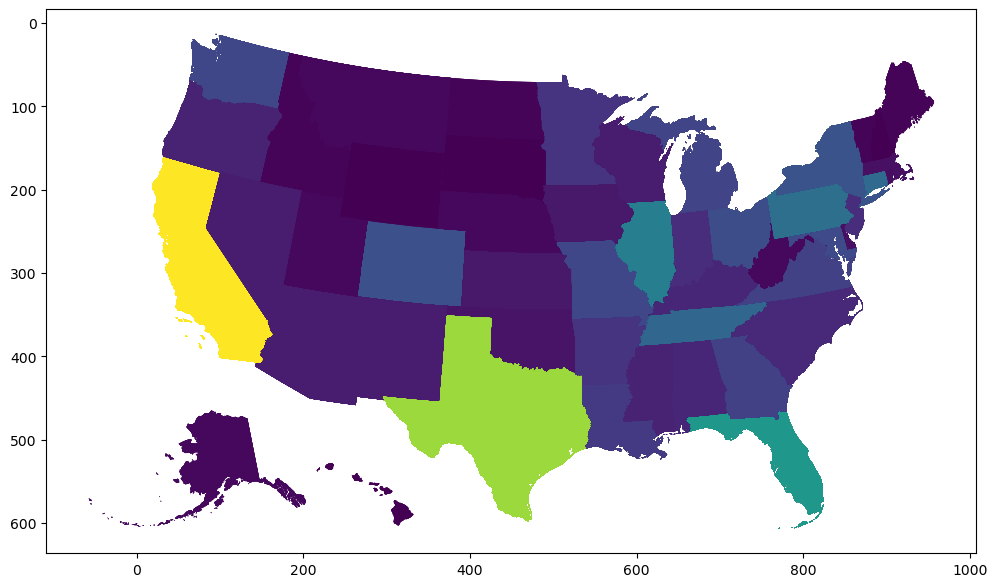

In [39]:
# Plot the GeoDataFrame with the aggregated values
fig, ax = plt.subplots(figsize=(12, 8))
agg_df.plot(column='Victims_Killed_y',ax=ax)
ax.set_ylim(ax.get_ylim()[::-1])
# Add labels, title, and legend

plt.show()


In [40]:
agg_df

,id,name,geometry,Incident_ID,Month,Day,Year,Date,School,Victims_Killed_x,...,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Active_Shooter_FBI,Shots_Fired,LAT,LNG,Victims_Killed_y
0,01,Alabama,"MULTIPOLYGON (((647.959 492.438, 651.817 491.5...",20230708ALWOB,7.0,8.0,2023.0,7/8/23,Woodlawn High School,1.0,...,No,No,No,Yes,No,No,99,33.541961,-86.751920,10.0
1,01,Alabama,"MULTIPOLYGON (((647.959 492.438, 651.817 491.5...",20230322ALANA,3.0,22.0,2023.0,3/22/23,Anniston High School,0.0,...,No,No,No,No,No,No,1,33.661273,-85.821059,10.0
2,01,Alabama,"MULTIPOLYGON (((647.959 492.438, 651.817 491.5...",20230130ALHOM,1.0,30.0,2023.0,1/30/23,Holloway Elementary School,0.0,...,No,No,No,No,NaN,No,99,30.710332,-88.097750,10.0
3,01,Alabama,"MULTIPOLYGON (((647.959 492.438, 651.817 491.5...",20221206ALLEM,12.0,6.0,2022.0,12/6/22,Robert E Lee High School,0.0,...,No,No,NaN,NaN,NaN,No,99,32.378531,-86.272260,10.0
4,01,Alabama,"MULTIPOLYGON (((647.959 492.438, 651.817 491.5...",20220609ALWAG,6.0,9.0,2022.0,6/9/22,Walnut Park Elementary School,0.0,...,NaN,NaN,NaN,NaN,NaN,No,NaN,34.010760,-86.056017,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,44,Rhode Island,"MULTIPOLYGON (((910.510 182.799, 911.637 182.8...",20180905RIPRP,9.0,5.0,2018.0,9/5/18,Providence Career and Technical Academy,1.0,...,No,No,No,No,Yes,No,<10,41.817412,-71.418498,3.0
2462,44,Rhode Island,"MULTIPOLYGON (((910.510 182.799, 911.637 182.8...",20120706RINAP,7.0,6.0,2012.0,7/6/12,Nathaniel Greene Elementary School,1.0,...,No,No,No,No,No,No,NaN,41.867805,-71.412150,3.0
2463,44,Rhode Island,"MULTIPOLYGON (((910.510 182.799, 911.637 182.8...",20070523RIOAC,5.0,23.0,2007.0,5/23/07,Oak Haven Elementary School,0.0,...,No,No,Yes,No,No,NaN,NaN,41.687066,-71.543708,3.0
2464,44,Rhode Island,"MULTIPOLYGON (((910.510 182.799, 911.637 182.8...",19900116RICEP,1.0,16.0,1990.0,1/16/90,Central High School,0.0,...,No,No,Yes,No,No,NaN,4,41.816563,-71.420964,3.0


In [42]:
!pip install pandas-geojson

In [47]:
agg_df['geometry'][:1]

0    MULTIPOLYGON (((647.959 492.438, 651.817 491.5...
Name: geometry, dtype: geometry

In [53]:
import geopandas as gpd
from shapely.geometry import MultiPolygon

gdf = gpd.GeoDataFrame(agg_df, geometry=geometry)

# Save the GeoDataFrame to a GeoJSON file
geojson_output_path = './data/output.geojson'
gdf.to_json(geojson_output_path, driver='GeoJSON')

print(f"GeoJSON file created: {geojson_output_path}")

ValueError: Unknown na method ./data/output.geojson

In [59]:
from pandas_geojson import to_geojson
geo_json = to_geojson(df=agg_df, lat='LAT', lon='LNG',
                 properties=agg_df.columns.to_list())
print(geo_json)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [60]:
from pandas_geojson import write_geojson
write_geojson(geo_json, filename='output.geojson', indent=4)

TypeError: Object of type Point is not JSON serializable

In [61]:

import geopandas as gpd

gdf = gpd.GeoDataFrame(agg_df, geometry=gpd.points_from_xy(agg_df['LNG'], agg_df['LAT']))
geo_json = gdf.to_crs(epsg='4326').to_json(indent=4)

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [5]:
number=3
print(f"the number is {number}")

the number is 3


In [7]:
import numpy as np 
a=np.arange(5)
a

array([0, 1, 2, 3, 4])